In [1]:
#Import standard librires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/nikhileswarkomati/suicide-watch')

Skipping, found downloaded files in ".\suicide-watch" (use force=True to force download)


# Data Preprocessing process

In [3]:
#load the dataset
data=pd.read_csv('suicide-watch/Suicide_Detection.csv')
data.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  232074 non-null  int64 
 1   text        232074 non-null  object
 2   class       232074 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.3+ MB


In [5]:
#Drop the unnamed column from the data
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
'''Checking the null values in the dataset'''
data.isna().sum()/len(data)*100


text     0.0
class    0.0
dtype: float64

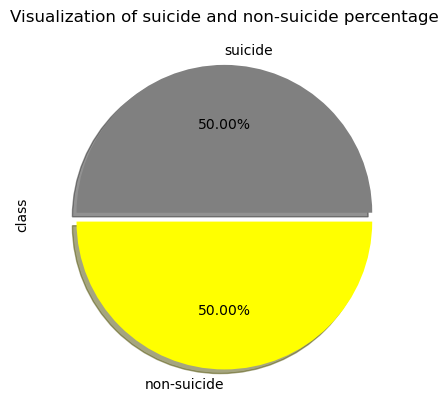

In [7]:
'''Visualize the object columns in the data we use value_counts function once we recevied values
we visualize the values using the pie charts'''
data['class'].value_counts()\
.plot(kind='pie',explode=[0.01,0.05],labels=['suicide','non-suicide'],colors=['gray','yellow'],autopct='%1.2f%%',shadow=True,title="Visualization of suicide and non-suicide percentage")
plt.show()

## Observations:
##### 1) Form the the above chart the both lables are equal and data is balanced.

In [84]:
'''We take 20000 text for machine learning models.
when we run the entire model our system will be slow becuase it's run cpu and take too much time '''
sample=data.sample(n=100000)
sample.shape

(100000, 2)

# Data Cleaning Process

In [85]:
# we do the nlp process we install necessary libraries for all required process
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
import wordcloud
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [86]:
sample.head(1)

,text,class
31655,I come for information Do people of French dis...,non-suicide


In [87]:
# we take the sample question for relate to suicide 
q1=sample[sample['class']=='suicide']
q2=q1.text.values[0]
q2

"I give up i just dont see the point any more, my life is going nowhere.  I fail at everything I do.  I'm 32 years old and i have never even kissed a girl.  I feel like the world would be better off without me.  "

In [88]:
'''
Cleaning the text data using the regex librarys,first we covert the string into lower
and then replce the unwanted items and finally join the text,and apply the function to 
the text data

'''
def cleaning_text(text):
    text=text.lower()
    text=re.sub(r'[^\w\s]','',text)
    text=re.sub(r'\d+','',text)
    text=re.sub(r'\n\n','',text)
    text=re.sub('[^A-Za-z0-9 ]+', '', text)
    text=re.sub(r"[-()\"#/@;:<>{}`+=~|*.!?,]", "", text)
    text=''.join(text)
    return text
sample['text']=sample['text'].apply(cleaning_text)

In [89]:
q2

"I give up i just dont see the point any more, my life is going nowhere.  I fail at everything I do.  I'm 32 years old and i have never even kissed a girl.  I feel like the world would be better off without me.  "

# Tokenization process for the sample question

In [90]:
sample_question=word_tokenize(q2)
sample_question

['I',
 'give',
 'up',
 'i',
 'just',
 'dont',
 'see',
 'the',
 'point',
 'any',
 'more',
 ',',
 'my',
 'life',
 'is',
 'going',
 'nowhere',
 '.',
 'I',
 'fail',
 'at',
 'everything',
 'I',
 'do',
 '.',
 'I',
 "'m",
 '32',
 'years',
 'old',
 'and',
 'i',
 'have',
 'never',
 'even',
 'kissed',
 'a',
 'girl',
 '.',
 'I',
 'feel',
 'like',
 'the',
 'world',
 'would',
 'be',
 'better',
 'off',
 'without',
 'me',
 '.']

# Remove the stopwords in the sample data.These words do not really signify any importance as they do not help in distinguishing two documents

In [91]:
'''We remove the stop word in the data it's very important clean the stopwords  '''
english_word=stopwords.words('english')
",".join(english_word)

"i,me,my,myself,we,our,ours,ourselves,you,you're,you've,you'll,you'd,your,yours,yourself,yourselves,he,him,his,himself,she,she's,her,hers,herself,it,it's,its,itself,they,them,their,theirs,themselves,what,which,who,whom,this,that,that'll,these,those,am,is,are,was,were,be,been,being,have,has,had,having,do,does,did,doing,a,an,the,and,but,if,or,because,as,until,while,of,at,by,for,with,about,against,between,into,through,during,before,after,above,below,to,from,up,down,in,out,on,off,over,under,again,further,then,once,here,there,when,where,why,how,all,any,both,each,few,more,most,other,some,such,no,nor,not,only,own,same,so,than,too,very,s,t,can,will,just,don,don't,should,should've,now,d,ll,m,o,re,ve,y,ain,aren,aren't,couldn,couldn't,didn,didn't,doesn,doesn't,hadn,hadn't,hasn,hasn't,haven,haven't,isn,isn't,ma,mightn,mightn't,mustn,mustn't,needn,needn't,shan,shan't,shouldn,shouldn't,wasn,wasn't,weren,weren't,won,won't,wouldn,wouldn't"

In [92]:
q2

"I give up i just dont see the point any more, my life is going nowhere.  I fail at everything I do.  I'm 32 years old and i have never even kissed a girl.  I feel like the world would be better off without me.  "

In [93]:
'''
We create a fuction that remove the all the stopwords.
in the loop  if word in the text the these word convert to lower
and it's not in the stopwords once we creat the function then we apply the
sample question in the data

'''
def remove_stopwords(text):
    return [word for word in text if word.lower() not in english_word]
question_remove_stopwords=remove_stopwords(sample_question)
question_remove_stopwords

['give',
 'dont',
 'see',
 'point',
 ',',
 'life',
 'going',
 'nowhere',
 '.',
 'fail',
 'everything',
 '.',
 "'m",
 '32',
 'years',
 'old',
 'never',
 'even',
 'kissed',
 'girl',
 '.',
 'feel',
 'like',
 'world',
 'would',
 'better',
 'without',
 '.']

# Stemming Process using SnowballStemmer

In [94]:
'''
Create a stemmer using the snowballstemmer
we create a stemming process after remove the stemmer
'''
snowball=SnowballStemmer(language='english')
snow=[snowball.stem(word) for word in question_remove_stopwords]
snow

['give',
 'dont',
 'see',
 'point',
 ',',
 'life',
 'go',
 'nowher',
 '.',
 'fail',
 'everyth',
 '.',
 "'m",
 '32',
 'year',
 'old',
 'never',
 'even',
 'kiss',
 'girl',
 '.',
 'feel',
 'like',
 'world',
 'would',
 'better',
 'without',
 '.']

In [95]:
#create a function for stemmimg using snowballstemmer
def stemming(text):
    snow=SnowballStemmer(languge='english')
    snow=[snow.stem(word) for word in text]
    snow=''.join(snow)
    return snow


# Lemmatization Process:

In [96]:
lemmatizer = WordNetLemmatizer()
q1_lem=lemmatizer.lemmatize(q2)
q1_lem

"I give up i just dont see the point any more, my life is going nowhere.  I fail at everything I do.  I'm 32 years old and i have never even kissed a girl.  I feel like the world would be better off without me.  "

In [97]:
#Let's apply all methods to the data
def text_preprocessing(text):
    #Word_tokenize
    words=word_tokenize(text)
    #Stop words removeble
    words=[word for word in words if word not in english_word]
    #Stemming process
    words=[snowball.stem(word) for word in words]
    #Lmmmatization
    words=[lemmatizer.lemmatize(word) for word in words]
    # Convert all words to lowercase
    words = [word.lower() for word in words]
    words=''.join(words)
    return words
sample['text']=sample['text'].apply(text_preprocessing)

In [98]:
sample.head()

,text,class
31655,comeinformpeoplfrenchdissentfindpepelepewinsul...,non-suicide
136032,onespeaksecondarearaidwondermanipeoplstillgo,non-suicide
130644,stillmissexseriousbrokeyearagostillcantgetmatt...,non-suicide
20102,posteveridayenddaycamelfavoritdayhumpdaygreatd...,non-suicide
170800,yalllikewishcrushlikewishcrushfucku,non-suicide


# Machine Learning Model

In [99]:
X=sample.drop(['class'],axis=1)
y=sample['class']

In [100]:
#Machinelearning libaries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [101]:
count=CountVectorizer()
count.fit(sample.text)

CountVectorizer()

In [102]:
def tokenize(text):
    return [snowball.stem(word) for word in word_tokenize(text)]
count=CountVectorizer(lowercase=True,tokenizer=tokenize,stop_words=english_word,max_features=1000)
count.fit(sample.text)
X=count.transform(sample.text)
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [103]:
# Divided the data into trainig and testing purpose
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [104]:
#Applied for Machine Learing alogrithms 
def model_predict(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f'The {model} accuracy score is {accuracy_score(y_test,y_pred)*100:.2f}')
    print(f'{model} classification_model {classification_report(y_test,y_pred)}')
    print(f'{model} confusion_matrix {confusion_matrix(y_test,y_pred)} ')
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='winter_r')

The LogisticRegression() accuracy score is 49.97
LogisticRegression() classification_model               precision    recall  f1-score   support

 non-suicide       1.00      0.00      0.00     15038
     suicide       0.50      1.00      0.67     14962

    accuracy                           0.50     30000
   macro avg       0.75      0.50      0.33     30000
weighted avg       0.75      0.50      0.33     30000

LogisticRegression() confusion_matrix [[   30 15008]
 [    0 14962]] 


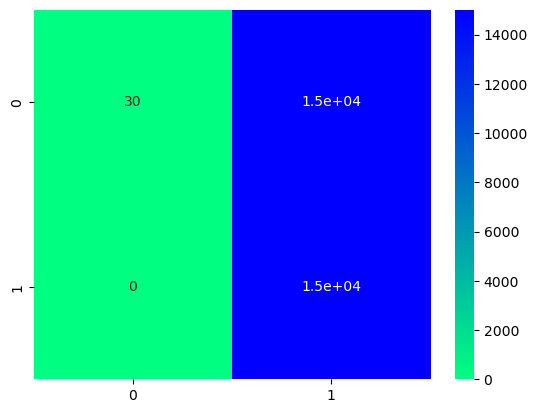

In [105]:
#LogisticRegression model
liner=LogisticRegression()
model_predict(liner,X_train,X_test,y_train,y_test)

The RandomForestClassifier() accuracy score is 49.97
RandomForestClassifier() classification_model               precision    recall  f1-score   support

 non-suicide       1.00      0.00      0.00     15038
     suicide       0.50      1.00      0.67     14962

    accuracy                           0.50     30000
   macro avg       0.75      0.50      0.33     30000
weighted avg       0.75      0.50      0.33     30000

RandomForestClassifier() confusion_matrix [[   30 15008]
 [    0 14962]] 


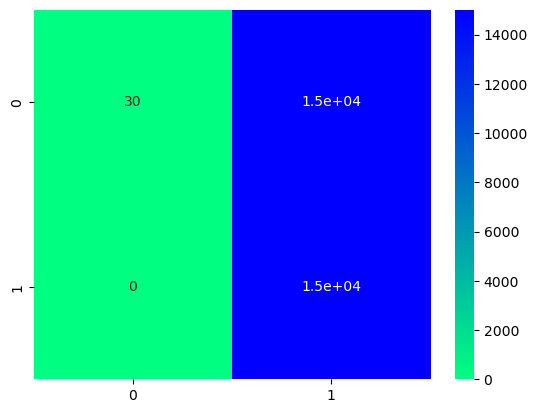

In [106]:
#RandomForestClassifier
model_predict(RandomForestClassifier(),X_train,X_test,y_train,y_test)

The DecisionTreeClassifier() accuracy score is 49.97
DecisionTreeClassifier() classification_model               precision    recall  f1-score   support

 non-suicide       1.00      0.00      0.00     15038
     suicide       0.50      1.00      0.67     14962

    accuracy                           0.50     30000
   macro avg       0.75      0.50      0.33     30000
weighted avg       0.75      0.50      0.33     30000

DecisionTreeClassifier() confusion_matrix [[   30 15008]
 [    0 14962]] 


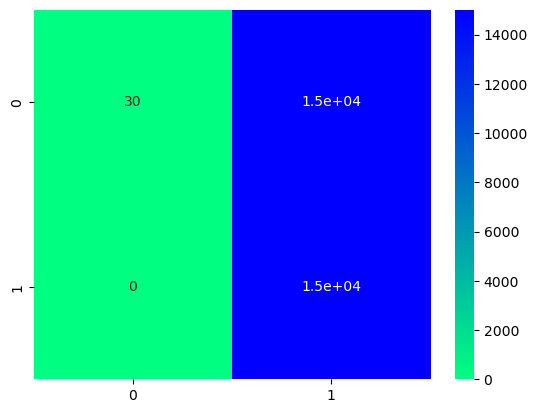

In [107]:
model_predict(DecisionTreeClassifier(),X_train,X_test,y_train,y_test)

The KNeighborsClassifier() accuracy score is 49.95
KNeighborsClassifier() classification_model               precision    recall  f1-score   support

 non-suicide       0.89      0.00      0.00     15038
     suicide       0.50      1.00      0.67     14962

    accuracy                           0.50     30000
   macro avg       0.70      0.50      0.33     30000
weighted avg       0.70      0.50      0.33     30000

KNeighborsClassifier() confusion_matrix [[   25 15013]
 [    3 14959]] 


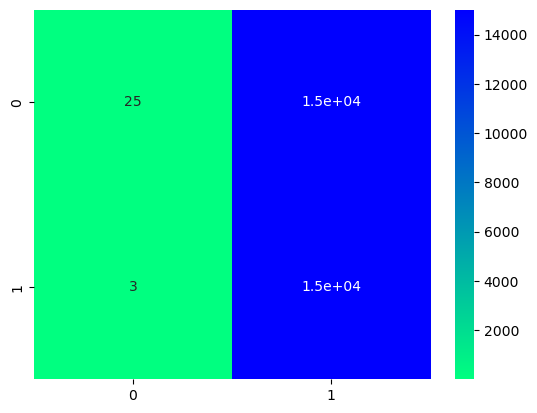

In [108]:
model_predict(KNeighborsClassifier(),X_train,X_test,y_train,y_test)